Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2024./2025.  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2025 Jan Šnajder, Domagoj Alagić

Rok za predaju: **20. listopada 2024. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija.

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [ ]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [ ]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial = PolynomialFeatures(degree=1)
design_matrix = polynomial.fit_transform(X)
print(design_matrix)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [ ]:
from numpy import linalg
product1 = np.matmul(design_matrix.T, design_matrix)
product1_inv = linalg.inv(product1)
product2 = np.matmul(product1_inv, design_matrix.T)
weights = np.matmul(product2, y)
print(weights)
weights_2 = np.matmul(linalg.pinv(design_matrix), y)
print(weights_2)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [ ]:
from sklearn.metrics import mean_squared_error
print(weights.T.shape, design_matrix.shape)
result_x = np.empty_like(y, dtype = float)
for (i,x) in enumerate(design_matrix):
  result_x[i] = np.matmul(weights.T, x)
print(result_x)
e = mean_squared_error(y, result_x)
print(e)

# Gore definira funkcija se upotrebljava kod linearne regresije zbog faktora 1/2
# koji olakšava buduće matematičke operacije, dok MSE ima faktor 1/N jer stvarno
# računa prosječnu pogrešku po uzorku te je zbog toga i realnija

(2,) (4, 2)
[2.2        2.65714286 3.11428571 4.02857143]
2.042857142857143


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [ ]:
try:
  weights_3 = np.matmul(linalg.inv(design_matrix), y)
except linalg.LinAlgError as error:
  print(f"Dogodio se error, {error}")

# To je slučaj jer ne možemo napraviti inverz od matrice koja nije kvadratna,
# a budući da možemo imati više primjera nego li što je dimenzija primjera
# često se dogodi da matrica nije kvadratna

# Problem se može riješiti preslikavanjem u više dimenzije tako da N broj primjera
# bude isti kao dim - dimenzija prostora uzorka

# Medutim, preslikavanjem u vise dimenzija dolazi se do moguce prenaucenosti
# te prekompleknosti modela za određene uzorke

# Primjer je ukoliko imamo dvije tocke koje leže na istom pravcu u 2D prostoru,
# mogućim proširivanjem na 3D prostor moguće je da te dvije točke više ne leže
# na istom pravcu zbog uvođenja nove dimenzije


Dogodio se error, Last 2 dimensions of the array must be square


### (e)

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print(f"Nagib {reg.coef_}")
print("===")
print(f"Odsjecak {reg.intercept_}")
print("===")
print(f"Predikcije {reg.predict(X)}")
print("===")
print(f"Pogreska {mean_squared_error(y, reg.predict(X))}")

Nagib [0.45714286]
===
Odsjecak 2.2
===
Predikcije [2.2        2.65714286 3.11428571 4.02857143]
===
Pogreska 2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html).

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [ ]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    labels = f(X)
    return labels + np.random.normal(0, noise, size = X.shape)

In [ ]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [ ]:
def f(x):
  return 5 + x + 2*(x**2) - 5*(x**3)

N=50
x1=-5
x2=5
noise=200
X = make_instances(x1,x2,N)
print(X.shape)
y = make_labels(X, f, 200)
print(y.shape)

(50, 1)
(50, 1)


Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

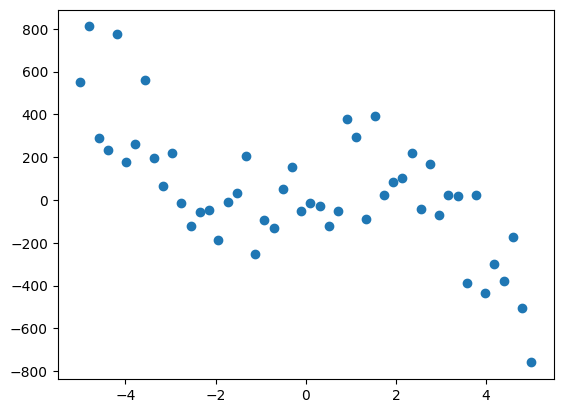

In [ ]:
plt.scatter(X,y)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Pogreska za stupanj 3 iznosi 27231.62310955002



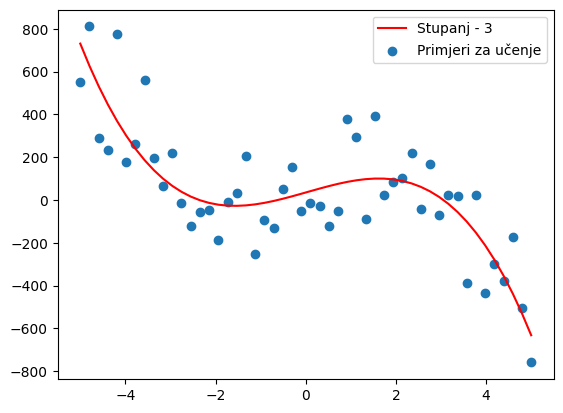

In [ ]:
def train_model_polynomial(degree, color, X, y):
  polynomial = PolynomialFeatures(degree = degree)
  design_matrix = polynomial.fit_transform(X)
  #print(design_matrix[0])
  reg = LinearRegression().fit(design_matrix, y)
  y_prediction = reg.predict(design_matrix)
  error = mean_squared_error(y, y_prediction)
  print(f"Pogreska za stupanj {degree} iznosi {error}")
  print()
  plt.plot(X, y_prediction, color=color, label = f"Stupanj - {degree}")


train_model_polynomial(3, "red", X, y)
plt.scatter(X, y, label = "Primjeri za učenje")
plt.legend()
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Pogreska za stupanj 1 iznosi 51970.378475130274

Pogreska za stupanj 3 iznosi 27231.62310955002

Pogreska za stupanj 5 iznosi 25724.239215364614

Pogreska za stupanj 10 iznosi 23985.30515051171

Pogreska za stupanj 20 iznosi 18224.295700938022



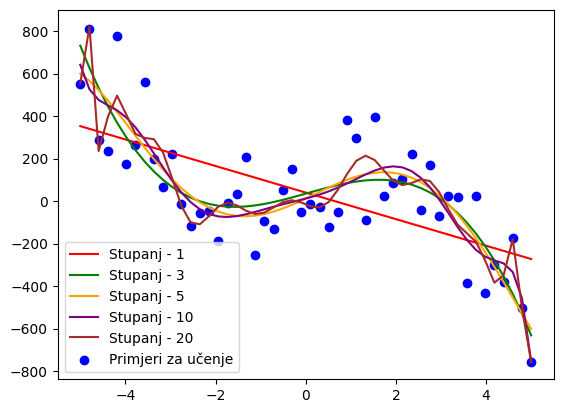

In [ ]:
degrees = [1,3,5,10,20]
colors = ['red', 'green', 'orange', 'purple', 'brown']
for degree, color in zip(degrees, colors):
  train_model_polynomial(degree, color, X, y)

plt.scatter(X, y, color = "blue", label = "Primjeri za učenje")
plt.legend()
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

True


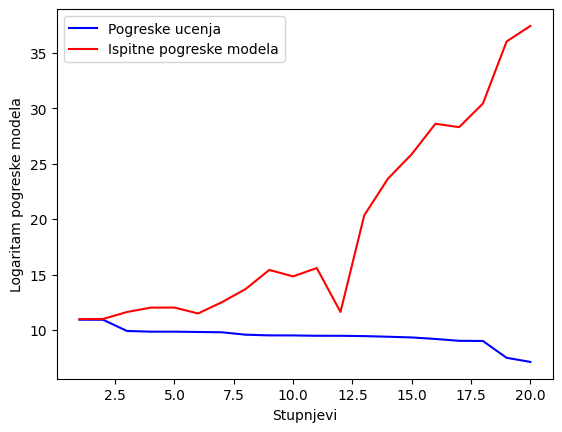

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5)
print(X_train.shape==X_test.shape)
degrees = range(1,21)
train_errors = []
test_errors = []

for degree in degrees:
  polynomial = PolynomialFeatures(degree = degree)

  X_train_design_matrix = polynomial.fit_transform(X_train)
  X_test_design_matrix = polynomial.transform(X_test)

  reg = LinearRegression().fit(X_train_design_matrix, y_train)

  y_train_prediction = reg.predict(X_train_design_matrix)
  y_test_prediction = reg.predict(X_test_design_matrix)

  mse_train = mean_squared_error(y_train, y_train_prediction)
  mse_test = mean_squared_error(y_test, y_test_prediction)

  train_errors.append(mse_train)
  test_errors.append(mse_test)

plt.plot(degrees, np.log(train_errors), color = "blue", label = "Pogreske ucenja")
plt.plot(degrees, np.log(test_errors), color = "red", label = "Ispitne pogreske modela")
plt.xlabel("Stupnjevi")
plt.ylabel("Logaritam pogreske modela")
plt.legend()
plt.show()


### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

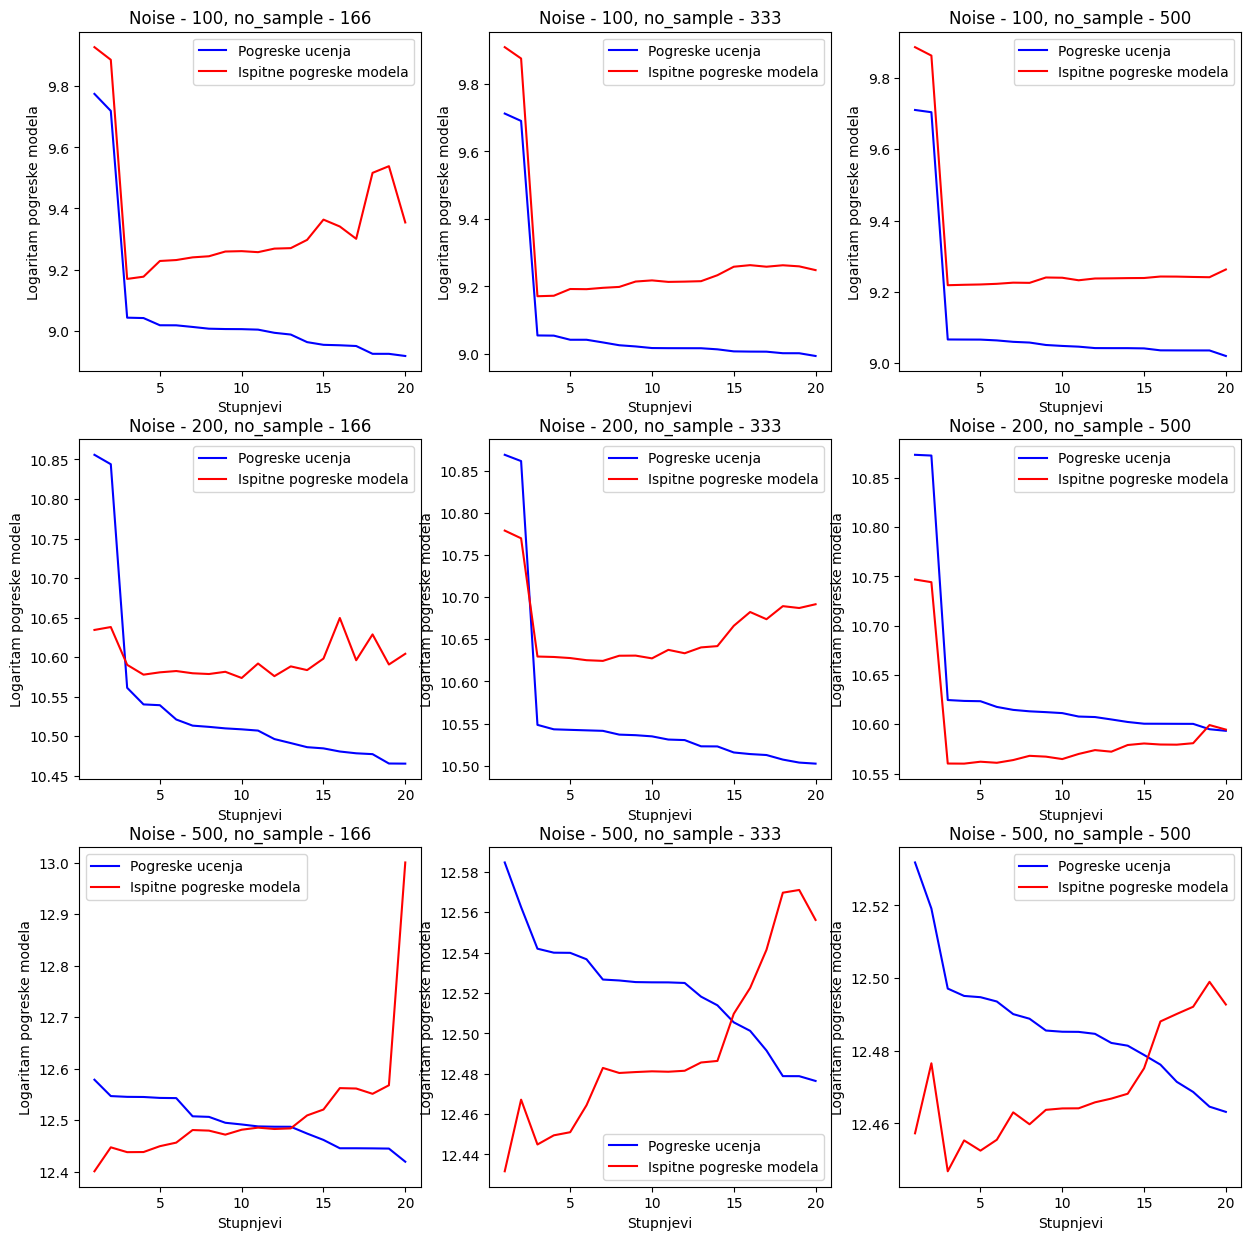

In [ ]:
N=1000
x1=-5
x2=5
X = make_instances(x1,x2,N)
X_train, X_test = train_test_split(X, test_size=0.5)
noises = [100,200,500]
no_samples = [1/3, 2/3, 1]

dataset_train = []
dataset_test = []

for noise in noises:
  y_labels_train = (make_labels(X_train, f, noise))
  y_labels_test = (make_labels(X_test, f, noise))
  for no in no_samples:
    size = int(no * len(X_train))

    X_train_sample = X_train[:size]
    y_train_sample = y_labels_train[:size]
    X_test_sample = X_test[:size]
    y_test_sample = y_labels_test[:size]

    dataset_train.append((X_train_sample, y_train_sample))
    dataset_test.append((X_test_sample, y_test_sample))

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
idx = 0

for (X_train_sample, y_train_sample), (X_test_sample, y_test_sample) in zip(dataset_train, dataset_test):
  row = idx // 3
  col = idx % 3
  train_errors = []
  test_errors = []
  for degree in degrees:
    polynomial = PolynomialFeatures(degree = degree)

    X_train_design_matrix = polynomial.fit_transform(X_train_sample)
    X_test_design_matrix = polynomial.transform(X_test_sample)

    reg = LinearRegression().fit(X_train_design_matrix, y_train_sample)

    y_train_prediction = reg.predict(X_train_design_matrix)
    y_test_prediction = reg.predict(X_test_design_matrix)

    mse_train = mean_squared_error(y_train_sample, y_train_prediction)
    mse_test = mean_squared_error(y_test_sample, y_test_prediction)

    train_errors.append(mse_train)
    test_errors.append(mse_test)
  axes[row, col].plot(degrees, np.log(train_errors), color = "blue", label = f"Pogreske ucenja")
  axes[row, col].plot(degrees, np.log(test_errors), color = "red", label = f"Ispitne pogreske modela")
  axes[row, col].set_xlabel("Stupnjevi")
  axes[row, col].set_ylabel("Logaritam pogreske modela")
  axes[row, col].set_title(f"Noise - {noises[row]}, no_sample - {len(X_train_sample)}")
  axes[row, col].legend()
  idx += 1

plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [ ]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

polynomial = PolynomialFeatures(degree=3)
design_matrix = polynomial.fit_transform(X)
identity_matrix = np.eye(design_matrix.shape[0], design_matrix.shape[1])

regulation_factors = [0, 1, 10]
ispis = True
for factor in regulation_factors:
  product1 = np.matmul(design_matrix.T, design_matrix)
  id_matrix_with_factor = factor * identity_matrix
  sum = product1 + id_matrix_with_factor
  if ispis:
    print(f"Dimenzija matrice koja se treba invertirat je {sum.shape}")
    ispis=False
  product1_inv = linalg.inv(sum)
  product2 = np.matmul(product1_inv, design_matrix.T)
  weights = np.matmul(product2, y)
  print(f"Tezine za regulacijski faktor {factor}:")
  print(weights)



Dimenzija matrice koja se treba invertirat je (4, 4)
Tezine za regulacijski faktor 0:
[ 4.         -5.91666667  3.375      -0.45833333]
Tezine za regulacijski faktor 1:
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
Tezine za regulacijski faktor 10:
[0.43312265 0.11060671 0.13827839 0.03093411]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [ ]:
from sklearn.linear_model import Ridge
for factor in regulation_factors:
  clf = Ridge(alpha = factor)
  clf.fit(design_matrix, y)
  print(f"Tezine za regulacijski faktor {factor}:")
  print(clf.intercept_)
  print(clf.coef_)

Tezine za regulacijski faktor 0:
4.0000000000000355
[ 0.         -5.91666667  3.375      -0.45833333]
Tezine za regulacijski faktor 1:
3.0569614512471652
[ 0.         -0.69079365 -0.2831746   0.1445805 ]
Tezine za regulacijski faktor 10:
2.4944418431229725
[ 0.         -0.15897295 -0.13423067  0.0815601 ]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

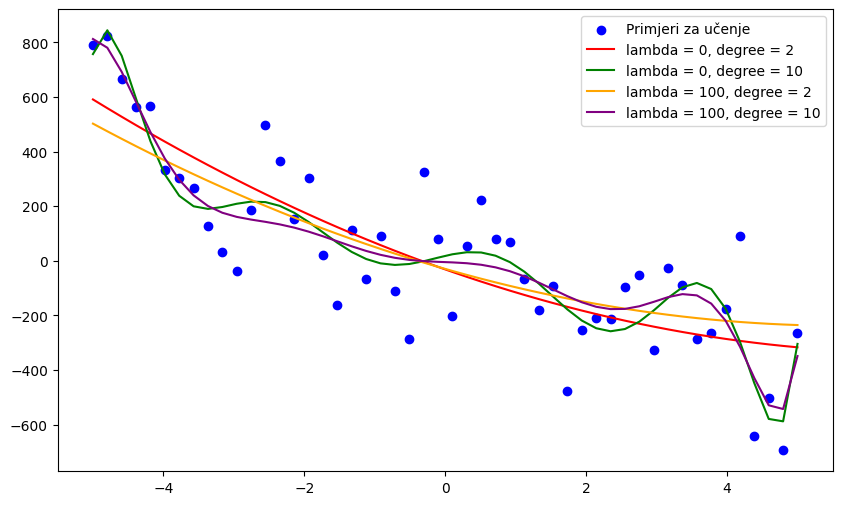

In [ ]:
lambdas = [0, 100]
degrees = [2, 10]
colors = ['red', 'green', 'orange', 'purple']

N=50
x1=-5
x2=5
noise=200
idx_color = 0
X = make_instances(x1,x2,N)
y = make_labels(X, f, 200)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color = "blue", label = "Primjeri za učenje")

for l in lambdas:
  for degree in degrees:
    polynomial = PolynomialFeatures(degree=degree)
    design_matrix = polynomial.fit_transform(X)
    clf = Ridge(alpha = l)
    clf.fit(design_matrix, y)
    y_pred = clf.predict(design_matrix)
    plt.plot(X, y_pred, color = colors[idx_color], label = f"lambda = {l}, degree = {degree}")
    idx_color+=1


plt.legend()
plt.show()

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


True


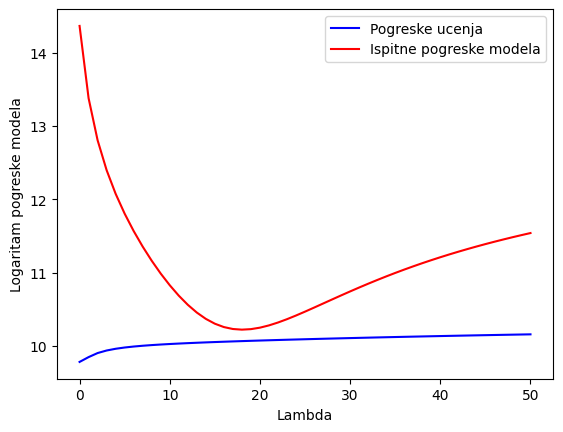

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5)
print(X_train.shape==X_test.shape)
lambdas = range(0,51)
train_errors = []
test_errors = []
polynomial = PolynomialFeatures(degree = 10)
X_train_design_matrix = polynomial.fit_transform(X_train)
X_test_design_matrix = polynomial.transform(X_test)
for l in lambdas:
  clf = Ridge(alpha = l)
  clf.fit(X_train_design_matrix, y_train)

  y_train_prediction = clf.predict(X_train_design_matrix)
  y_test_prediction = clf.predict(X_test_design_matrix)

  mse_train = mean_squared_error(y_train, y_train_prediction)
  mse_test = mean_squared_error(y_test, y_test_prediction)

  train_errors.append(mse_train)
  test_errors.append(mse_test)

plt.plot(lambdas, np.log(train_errors), color = "blue", label = "Pogreske ucenja")
plt.plot(lambdas, np.log(test_errors), color = "red", label = "Ispitne pogreske modela")
plt.xlabel("Lambda")
plt.ylabel("Logaritam pogreske modela")
plt.legend()
plt.show()


### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [ ]:
def nonzeroes(coef, tol=1e-6):
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

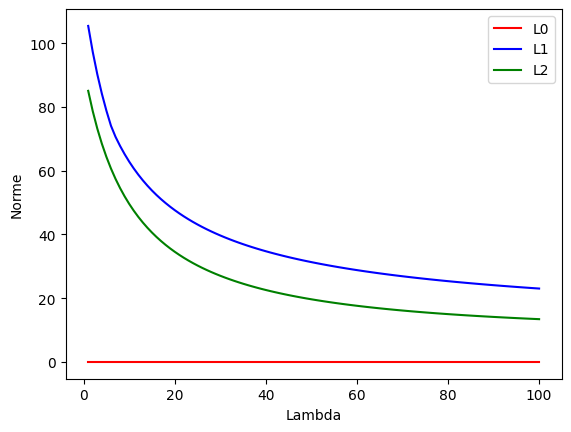

In [ ]:
from sklearn.linear_model import Ridge
polynomial = PolynomialFeatures(degree = 5)
lambdas = range(1,101)

l0, l1, l2 = [], [], []
X_train_design_matrix = polynomial.fit_transform(X_train)

for l in lambdas:
  clf = Ridge(alpha = l)
  clf.fit(X_train_design_matrix, y_train)

  coef = clf.coef_

  l0.append(nonzeroes(coef))
  l1.append(np.sum(np.abs(coef)))
  l2.append(np.sqrt(np.sum(coef**2)))

plt.plot(lambdas, l0, color="red", label = "L0")
plt.plot(lambdas, l1, color="blue", label = "L1")
plt.plot(lambdas, l2, color="green", label = "L2")
plt.xlabel("Lambda")
plt.ylabel("Norme")
plt.legend()
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

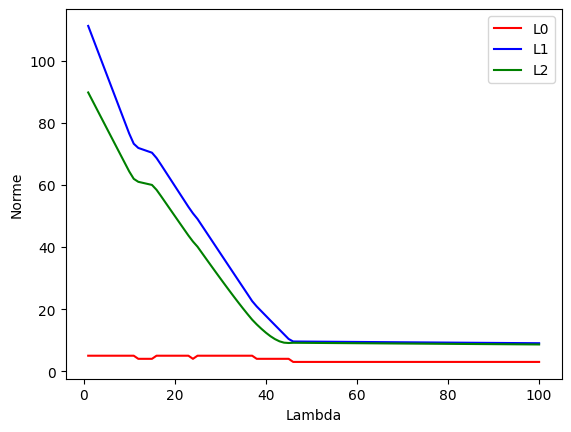

In [ ]:
from sklearn.linear_model import Lasso

l0, l1, l2 = [], [], []

for l in lambdas:
  clf = Lasso(alpha = l, max_iter= 10000)
  clf.fit(X_train_design_matrix, y_train)

  coef = clf.coef_

  l0.append(nonzeroes(coef))
  l1.append(np.sum(np.abs(coef)))
  l2.append(np.sqrt(np.sum(coef**2)))

plt.plot(lambdas, l0, color="red", label = "L0")
plt.plot(lambdas, l1, color="blue", label = "L1")
plt.plot(lambdas, l2, color="green", label = "L2")
plt.xlabel("Lambda")
plt.ylabel("Norme")
plt.legend()
plt.show()

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [ ]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points)
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

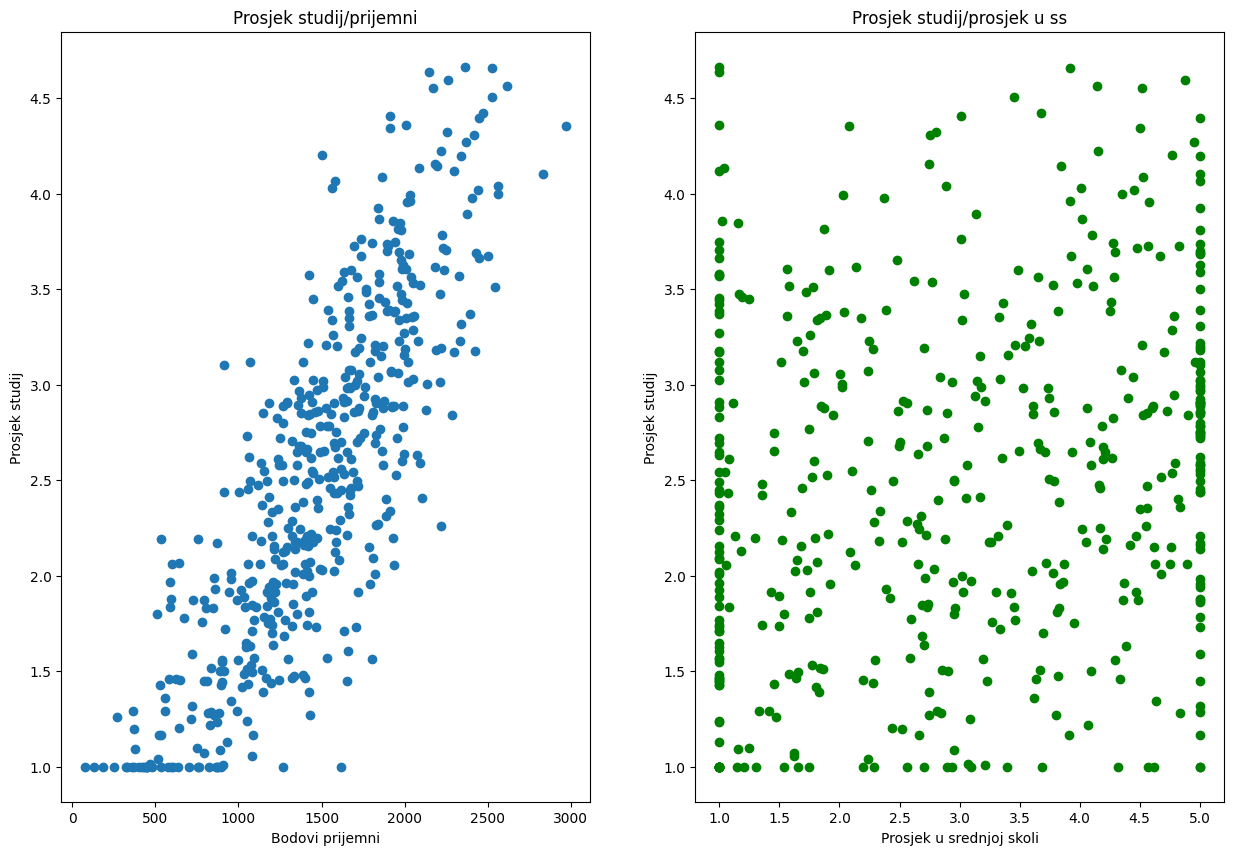

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].scatter(exam_score, grades_y)
axes[0].set_title("Prosjek studij/prijemni")
axes[0].set_xlabel("Bodovi prijemni")
axes[0].set_ylabel("Prosjek studij")
axes[1].scatter(grade_in_highschool, grades_y, color="green")
axes[1].set_title("Prosjek studij/prosjek u ss")
axes[1].set_xlabel("Prosjek u srednjoj skoli")
axes[1].set_ylabel("Prosjek studij")
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [ ]:
reg_factor = 0.01
clf = Ridge(alpha = reg_factor)
clf.fit(grades_X, grades_y)
print(clf.intercept_)
print(clf.coef_)
y_predict = clf.predict(grades_X)

0.15061179575776018
[0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)
grades_y_fixed = scaler.fit_transform(grades_y.reshape(-1,1))
clf = Ridge(alpha = reg_factor)
clf.fit(grades_X_fixed, grades_y_fixed)
print(clf.intercept_)
print(clf.coef_)
y_fit_predict = clf.predict(grades_X_fixed)

[8.62551331e-17]
[[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *6b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [ ]:
grades_X_fixed_colinear = np.column_stack((grades_X_fixed, grades_X_fixed[:,-1]))

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [ ]:
clf = Ridge(alpha = reg_factor)
clf.fit(grades_X_fixed_colinear, grades_y_fixed)
print(clf.intercept_)
print(clf.coef_)

[8.6255971e-17]
[[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *6
b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [ ]:
lambdas = [0.01, 1000]
w_dict = {l: [] for l in lambdas}


for i in range(10):
  grades_X_fixed_colinear_1, _, grades_y_fixed_1, _ = train_test_split(
      grades_X_fixed_colinear, grades_y_fixed, test_size=0.5)
  print(f"Pokus broj {i+1} - tezine")
  for l in lambdas:
    clf = Ridge(alpha = l)
    clf.fit(grades_X_fixed_colinear_1, grades_y_fixed_1)
    print(f"Lambda - {l}")
    print(clf.coef_)
    w_dict[l].append(clf.coef_)
  print()

for l in lambdas:
  w = np.array(w_dict[l])
  print(f"Standardna devijacija za tezine za lambda - {l}")
  print(np.std(w, axis=0))



Pokus broj 1 - tezine
Lambda - 0.01
[[0.85856502 0.06370346 0.06370346]]
Lambda - 1000
[[0.18147337 0.03024789 0.03024789]]

Pokus broj 2 - tezine
Lambda - 0.01
[[0.78031283 0.0716109  0.0716109 ]]
Lambda - 1000
[[0.17290475 0.03224382 0.03224382]]

Pokus broj 3 - tezine
Lambda - 0.01
[[0.79836485 0.08917397 0.08917397]]
Lambda - 1000
[[0.17177455 0.03639403 0.03639403]]

Pokus broj 4 - tezine
Lambda - 0.01
[[0.85221448 0.08685247 0.08685247]]
Lambda - 1000
[[0.1594104  0.03727872 0.03727872]]

Pokus broj 5 - tezine
Lambda - 0.01
[[0.79485342 0.06464141 0.06464141]]
Lambda - 1000
[[0.15655526 0.0213011  0.0213011 ]]

Pokus broj 6 - tezine
Lambda - 0.01
[[0.8117652  0.05947811 0.05947811]]
Lambda - 1000
[[0.17128974 0.02905529 0.02905529]]

Pokus broj 7 - tezine
Lambda - 0.01
[[0.79954244 0.07785614 0.07785614]]
Lambda - 1000
[[0.15692664 0.03417108 0.03417108]]

Pokus broj 8 - tezine
Lambda - 0.01
[[0.79814491 0.07347826 0.07347826]]
Lambda - 1000
[[0.18241614 0.02917916 0.02917916]]



**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.